The dataset includes sample data of 1000 startup companies operating cost and their profit. 

In [23]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv('cpmpany.csv') # Load the Dataset

In [25]:
 df.head() # Explore the Dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [26]:
df.describe() # Basic Statistics of the Dataset

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


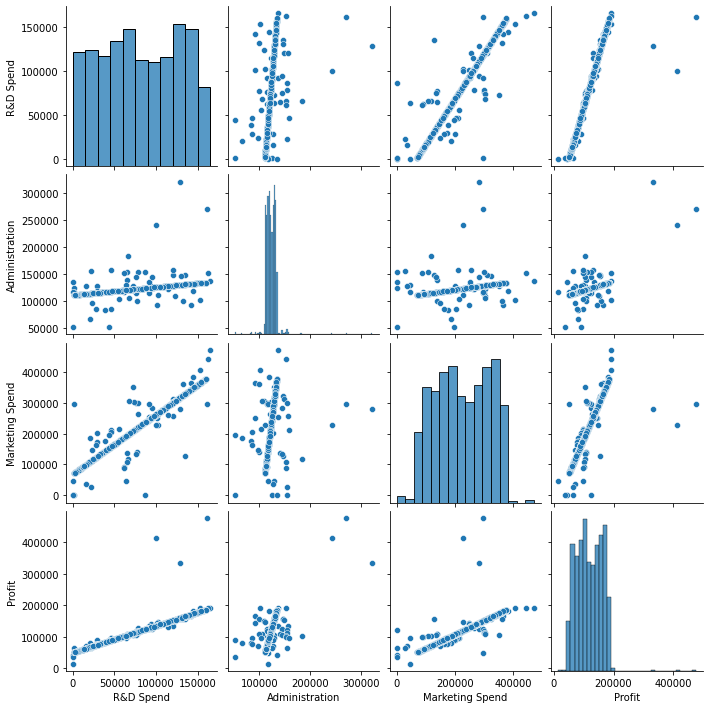

In [8]:
sns.pairplot(df) # Missing Value Detection

<AxesSubplot:>

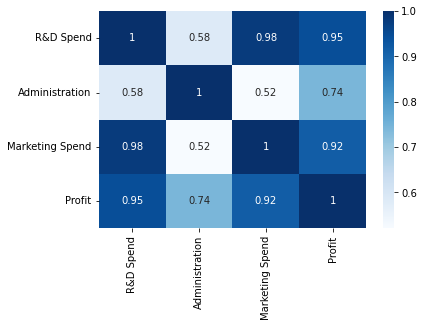

In [9]:
sns.heatmap(df.corr(),cmap = 'Blues', annot=True)

In [10]:
X = df[['R&D Spend', 'Administration','Marketing Spend']] # Splitting the Data
y = df['Profit']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression # Training the Model

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [17]:
lm.coef_

array([0.64835349, 0.86729695, 0.04598628])

In [18]:
pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

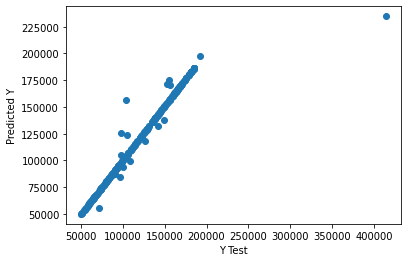

In [19]:
plt.scatter(y_test,pred) # Predicting the Model
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [20]:
from sklearn import metrics # Evaluating the Model

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 1901.0964068611502
Mean Squared Error: 126707242.6092743
Root Mean Squared Error: 11256.431166638666


In [22]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
R&D Spend,0.648353
Administration,0.867297
Marketing Spend,0.045986
